<a href="https://colab.research.google.com/github/saswotnayak/ML_models_from_scratch/blob/main/Handwritten_Letter_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing required libraries
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [ ]:
#Reading the data into a pandas dataframe by mounting data from google drive.
data = pd.read_csv("/content/drive/My Drive/Classroom/CS230-CS561-Probability and Statistics for Computer Science 2 year UG/project/A_Z Handwritten Data.csv")

In [ ]:
#setting the display limit for ease of observing data clearly.
pd.set_option("display.max_columns",785)
data.shape

(372450, 785)

In [ ]:
"""-----------------------------------------(Data)-------------------------------------------------------------------------------------------
    -> The data var is pandas DataFrame contains the data from a csv file.
    -> It has 372450 rows and 785 columns.
    -> Each rows contains the pixel value of a picture of hand written letter.
    -> There is 785 columns values, where first column have the label data corresponding to that picture and
       rest 784 is the pixel value of each pixel ie- (28 * 28).
    -> Each pixel value can be of range (0,255).
   ------------------------------------------------------------------------------------------------------------------------------------------ 
"""
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.100,0.101,0.102,0.103,0.104,0.105,0.106,0.107,0.108,0.109,0.110,0.111,0.112,0.113,0.114,0.115,0.116,0.117,0.118,0.119,0.120,0.121,0.122,0.123,0.124,0.125,0.126,32,215,235,43,0.127,0.128,0.129,0.130,0.131,0.132,0.133,0.134,0.135,0.136,0.137,0.138,0.139,0.140,0.141,0.142,0.143,0.144,0.145,0.146,0.147,0.148,0.149,0.150,130,255,255.1,107,0.151,0.152,0.153,0.154,0.155,0.156,0.157,0.158,0.159,0.160,0.161,0.162,0.163,0.164,0.165,0.166,0.167,0.168,0.169,0.170,0.171,0.172,0.173,14,227,255.2,255.3,107.1,0.174,0.175,0.176,0.177,0.178,0.179,0.180,0.181,0.182,0.183,0.184,0.185,0.186,0.187,0.188,0.189,0.190,0.191,0.192,0.193,0.194,0.195,0.196,152,255.4,255.5,255.6,162,0.197,0.198,0.199,0.200,0.201,0.202,0.203,0.204,0.205,0.206,0.207,0.208,0.209,0.210,0.211,0.212,0.213,0.214,0.215,0.216,0.217,0.218,91,255.7,255.8,255.9,255.10,190,0.219,0.220,0.221,0.222,0.223,0.224,0.225,0.226,0.227,0.228,0.229,0.230,0.231,0.232,0.233,0.234,0.235,0.236,0.237,0.238,0.239,47,237,255.11,212,188,255.12,190.1,0.240,0.241,0.242,0.243,0.244,0.245,0.246,0.247,0.248,0.249,0.250,0.251,0.252,0.253,0.254,0.255,0.256,0.257,0.258,0.259,0.260,113,255.13,255.14,97,136,255.15,190.2,0.261,0.262,0.263,0.264,0.265,0.266,0.267,0.268,0.269,0.270,0.271,0.272,0.273,0.274,0.275,0.276,0.277,0.278,0.279,0.280,43.1,235.1,255.16,158,0.281,136.1,255.17,107.2,0.282,0.283,0.284,0.285,0.286,0.287,0.288,0.289,0.290,0.291,0.292,0.293,0.294,0.295,0.296,0.297,0.298,0.299,0.300,0.301,107.3,255.18,255.19,75,0.302,136.2,255.20,107.4,0.303,0.304,0.305,0.306,0.307,0.308,0.309,0.310,0.311,0.312,0.313,0.314,0.315,0.316,0.317,0.318,0.319,0.320,0.321,67,233,255.21,255.22,255.23,212.1,215.1,255.24,206,170,170.1,142,0.322,0.323,0.324,0.325,0.326,0.327,0.328,0.329,0.330,0.331,0.332,0.333,0.334,0.335,0.336,0.337,156,255.25,255.26,255.27,255.28,255.29,255.30,255.31,255.32,255.33,255.34,255.35,0.338,0.339,0.340,0.341,0.342,0.343,0.344,0.345,0.346,0.347,0.348,0.349,0.350,0.351,0.352,40,255.36,255.37,255.38,243,128,156.1,188.1,255.39,255.40,176,117,57,0.353,0.354,0.355,0.356,0.357,0.358,0.359,0.360,0.361,0.362,0.363,0.364,0.365,0.366,0.367,67.1,255.41,255.42,142.1,0.368,0.369,0.370,53,255.43,190.3,0.371,0.372,0.373,0.374,0.375,0.376,0.377,0.378,0.379,0.380,0.381,0.382,0.383,0.384,0.385,0.386,0.387,4,229,255.44,239,20,0.388,0.389,0.390,53.1,255.45,190.4,0.391,0.392,0.393,0.394,0.395,0.396,0.397,0.398,0.399,0.400,0.401,0.402,0.403,0.404,0.405,0.406,0.407,89,255.46,255.47,176.1,0.408,0.409,0.410,0.411,53.2,255.48,233.1,12,0.412,0.413,0.414,0.415,0.416,0.417,0.418,0.419,0.420,0.421,0.422,0.423,0.424,0.425,0.426,0.427,227.1,255.49,249,71,0.428,0.429,0.430,0.431,0.432,225,255.50,18,0.433,0.434,0.435,0.436,0.437,0.438,0.439,0.440,0.441,0.442,0.443,0.444,0.445,0.446,0.447,0.448,144,223,130.1,0.449,0.450,0.451,0.452,0.453,0.454,170.2,255.51,101,0.455,0.456,0.457,0.458,0.459,0.460,0.461,0.462,0.463,0.464,0.465,0.466,0.467,0.468,0.469,0.470,0.471,0.472,0.473,0.474,0.475,0.476,0.477,0.478,0.479,142.2,255.52,184,0.480,0.481,0.482,0.483,0.484,0.485,0.486,0.487,0.488,0.489,0.490,0.491,0.492,0.493,0.494,0.495,0.496,0.497,0.498,0.499,0.500,0.501,0.502,0.503,0.504,59,255.53,255.54,12.1,0.505,0.506,0.507,0.508,0.509,0.510,0.511,0.512,0.513,0.514,0.515,0.516,0.517,0.518,0.519,0.520,0.521,0.522,0.523,0.524,0.525,0.526,0.527,0.528,59.1,255.55,152.1,4.1,0.529,0.530,0.531,0.532,0.533,0.534,0.535,0.536,0.537,0.538,0.539,0.540,0.541,0.542,0.543,0.544,0.545,0.546,0.547,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.56

In [ ]:
#reseting the columns to noraml indexing scheme
data.columns = list(range(785))
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,177,255,188,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,130,255,255,255,161,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,55,242,255,246,255,249,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,255,255,192,112,255,255,219,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,89,255,255,255,94,55,249,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,238,255,255,229,39,78,253,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,255,255,228,45,0,0,242,255,174,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,132,248,255,243,115,0,0,8,243,255,94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,245,255,255,206,170,45,0,94,255,255,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,183,255,255,255,255,255,235,145,161,255,255,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,255,255,255,

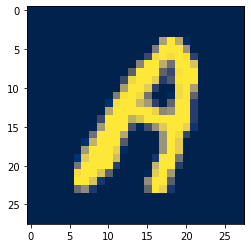

In [ ]:
#Plotting a first row data to see the image.
pixel = np.array(data.loc[0])
plt.imshow(pixel[1:].reshape((28,28)),cmap ='cividis')

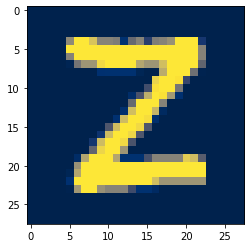

In [ ]:
#Plotting a last row data to see the image.
pixel = np.array(data.loc[372449])
plt.imshow(pixel[1:].reshape((28,28)),cmap ='cividis')

In [ ]:
""" --------------------------train_test_split(data,train_per)-------------------------------------------------------------------------------------
    -> This Function splits data into suitable format for further processing. 
    -> First data get shuffled as each class of data are together in the original data.
    -> Then data got splitted into tain and test data as per percentage given for training data.
    -> Then train and test data get separated by all the features into one set as X and all labels into one set as Y
    -> Then original dataset get deleted to avoid unnessecarry kernel crash beacuse of heavy ram use.

    Input:  1. data - Whole data in a pandas DataFrame format.
            2. train_per - It is the percentage value of train data outof whole data.

    Output: Four sets of data in pandas DataFrame format.
            Those sets are following
              X_train - It contains all the features ie - 784 feature.
              Y_train - It contains all the class label corresponding to features in X_tain.
              X_test  - It contains all the features ie -784 features.
              Y_test  - It contains all the class label corresponding to features in X_test. 
    ------------------------------------------------------------------------------------------------------------------------------------------------
"""
def train_test_split(data, train_per):
    
    #Shuffling the data 
    data = data.sample(frac=1,random_state=1)
    
    #Spliting into test set and train set 
    train, test = np.split(data,[int(train_per * len(data))])
    
    #Spliting fetures and labels
    X_test, Y_test = test.drop(0,axis ='columns'), test[0]
    X_train, Y_train = train.drop(0,axis ='columns'), train[0]

    #Deleting original data frame inorder to make RAM available
    del data
    
    return X_train,X_test,Y_train,Y_test

In [ ]:
""" -------------------------- prep_data(X_train,Y_train,X_test,Y_test)---------------------------------------------------------------------------
    -> This Function prepares data such that it is suitable to train and test with a model. 
    -> Index and Column values are reset , as there is non-uniforfimity as part of suffling of data.
    -> We normalize the features by divinding data by 255.0 . So data now will be range of (0,1) as 
       suppose to (0,255), which is too large to compute further.
    -> Then finally we convert each set into ndarray inorder to ease of calulation.

    Input:    Four sets of data in pandas DataFrame format.
              Those sets are following
              X_train - It contains all the features ie - 784 feature.
              Y_train - It contains all the class label corresponding to features in X_tain.
              X_test  - It contains all the features ie -784 features.
              Y_test  - It contains all the class label corresponding to features in X_test.

    Output: Four sets of data in numpy array format.
            Those sets are following
              X_train - It contains all the features ie - 784 feature.
              Y_train - It contains all the class label corresponding to features in X_tain.
              X_test  - It contains all the features ie -784 features.
              Y_test  - It contains all the class label corresponding to features in X_test.
    -------------------------------------------------------------------------------------------------------------------------------------------
"""
def prep_data(X_train,Y_train,X_test,Y_test):
  
  #Resetting the indices of test and train data
  X_train.reset_index(inplace=True)
  X_train.drop(columns='index',inplace=True)
  Y_train.reset_index(drop=True,inplace=True)

  X_test.reset_index(inplace=True)
  X_test.drop(columns='index',inplace=True)
  Y_test.reset_index(drop=True,inplace=True)

  #Normalising the test and train data
  X_test = X_test / 255.0 
  X_train = X_train / 255.0

  #converting datatype of training and test data from dataframe to ndarray for ease of processing futher.
  X_train = X_train.to_numpy()
  Y_train = Y_train.to_numpy()
  X_test = X_test.to_numpy()
  Y_test = Y_test.to_numpy()

  return X_train,Y_train,X_test,Y_test

In [ ]:
""" -------------------------- class Gaussian_NB---------------------------------------------------------------------------
    -> This is the Gasussian naive bayes class contains all the required methods that helps to train and test the data on.
    -> It has Four methods fit(), predict(), helper_predict(), pdf() .
    -> fit() method takes training data and helps build mean and var and priors of each feature by label.
    -> predict() enumerates on each single test row one by one by calling helper_predict().
    -> helper_predict() calulates postirior of each row of test data.
    -> pdf() calulates the gaussian probability density function of each row.
    -------------------------------------------------------------------------------------------------------------------------------------------
"""
class Gaussian_NB:
    
    """
        This function caluculates mean , variance and prior of each feature on each label data.

        Input:    X - It is the training features
                  y - It is training label corresponding to the training features.
                  smoothing - Smoothing parameter is used for deal with divide by zero, and low accurecy.
        Output:   It builds mean and variance for combination of each featureas and each unique class.
                  And priors for each unique class.
    """
    def fit(self, X, y,smoothing = 10e-3):
      n_samples, n_features = X.shape
      self.classes = np.unique(y)              #Unique classes
      n_classes = len(self.classes)            #Total unique classes

      #Declaring mean, variance matrix and ndarray for priors.
      self.mean = np.zeros((n_classes, n_features), dtype=np.float64)
      self.var = np.zeros((n_classes, n_features), dtype=np.float64)
      self.priors =  np.zeros(n_classes, dtype=np.float64)
      
      #Calulating mean ,variance and prioors for each class. 
      for idx, c in enumerate(self.classes):
        temp = X[y==c]
        self.mean[idx, :] = temp.mean(axis=0)
        self.var[idx, :] = temp.var(axis=0) + smoothing
        self.priors[idx] = temp.shape[0] / float(n_samples)

    
    """
        This function predicts the label  for each test row by the help of helper function.
        
        Input:    X - It is the feature set of test set.
        Output:   A numpy array full of predicted label values for X_test set. 
    """
    def predict(self, X):
      start = time.time() 
      y_pred = [self.helper_predict(x) for x in X]
      end = time.time()
      print("Gaussian model takes ", "%.2f"%float(end - start), "sec to predict.")
      return np.array(y_pred)
    
    
    """
        This function builds posterior of each single image data using the gaussian pdf.
        It builds posterior corresponding to each class and return that class having highest posterior.

        Input:    x - It is the numpy 1D array full of all fetures value of one example/image.
        Output:   Predicted class value for the given image. 
    """
    def helper_predict(self, x):
      posteriors = []

      # calculate posterior probability for each class
      for idx, c in enumerate(self.classes):
        prior = np.log(self.priors[idx])
        posterior = np.sum(np.log(self.pdf(idx, x)))
        posterior = prior + posterior
        posteriors.append(posterior)
            
      # return class with highest posterior probability
      return self.classes[np.argmax(posteriors)]
            

    """
        This function implements the Gaussian probability for given set of features values and given class.
        Returns a probability density value of the given set of features values.

        Input:    x - It is the numpy 1D array full of all fetures value of one example/image.
                  Class_idx - One perticular class index of concern.
        Output:   prob - It is the probability of the given class and set of features value.
    """
    def pdf(self, class_idx, x):
      mean = self.mean[class_idx]
      var = self.var[class_idx]
      numerator = np.exp(- (x-mean)**2 / (2 * var))
      denominator = np.sqrt(2 * np.pi * var) 
      prob = numerator / denominator 
      return prob

In [ ]:
""" 
    This function Calulates the accurecy of predicted labels on given original labels of test set.

    Input:    Y_test -    This is the ndarray containing all the labels corresponding to test dataset.
              Y_pred -    This is the predicted labels on test features values.
    Output:   accurecy -  It is the accurecy score that indicates how many predicted labels is correct out of all the test labels. 
"""
def accurecy(Y_test, Y_pred):
  accurecy = np.sum(Y_test == Y_pred) / len(Y_test)
  return accurecy

In [ ]:
""" 
    This function Prepares confusion matrix out of predicted and actual label.

    Input:    Y_test -    This is the ndarray containing all the labels corresponding to test dataset.
              Y_pred -    This is the predicted labels on test features values.
    Output:   Prints the confusion matrix. 
"""
def display_confusion(Y_pred,y_test):
  #Building confusion matrix
  cnf_mat = pd.crosstab(Y_pred,Y_test)
  cnf_mat.to_numpy()

  #Making list of labels
  labels =[ chr(i) for i in range(65,91)]
  
  #Plotting histogram of confusion matrix using seaborn
  fig, ax = plt.subplots(figsize=(13,13))  
  sns.heatmap(cnf_mat, annot =True,fmt=".0f" ,cmap= 'BuGn',xticklabels=labels,yticklabels=labels)

In [ ]:
 #Splitting the data into training and testing sets.
 X_train, X_test, Y_train, Y_test = train_test_split(data,0.9)

 #Preparing data into suitable format.
 X_train,Y_train,X_test,Y_test = prep_data(X_train,Y_train,X_test,Y_test)

Gaussian model takes  55.77 sec to predict.
accurecy is 69.46704255604779 %


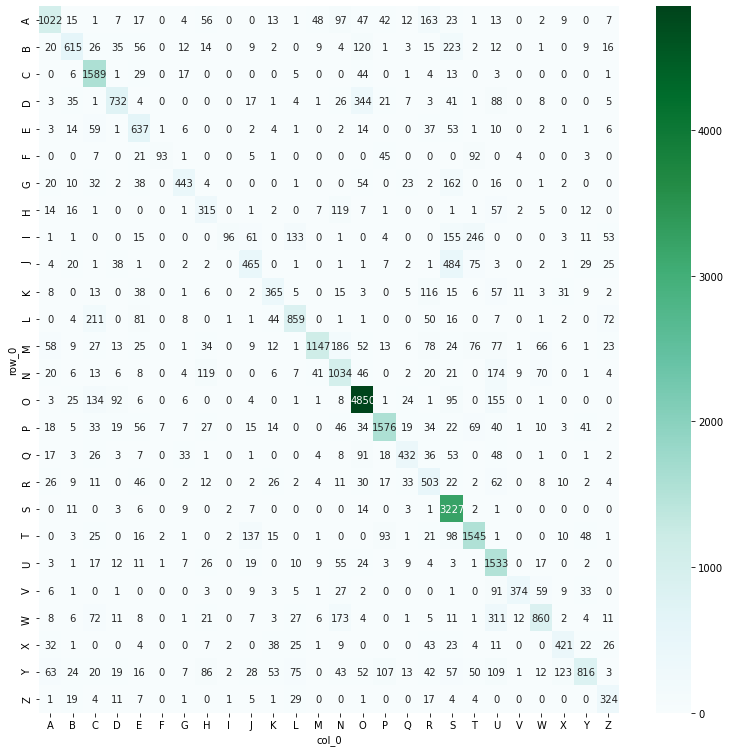

In [ ]:
#Data is trained and tested using  Gaussian Naive Bayes model coded from scratch
model = Gaussian_NB()
model.fit(X_train,Y_train)  #here smoothing constant is default ie : 10e-3
Y_pred = model.predict(X_test)
display_confusion(Y_pred, Y_test)
print("accurecy is",accurecy(Y_test,Y_pred)*100, "%")

Gaussian model takes  55.68 sec to predict.
Gaussian model takes  56.12 sec to predict.
Gaussian model takes  57.68 sec to predict.
Gaussian model takes  62.83 sec to predict.
for smoothing parameter  1.0  Accurecy we got  62.48086991542488
for smoothing parameter  0.1  Accurecy we got  67.26271982816485
for smoothing parameter  0.01  Accurecy we got  69.46704255604779
for smoothing parameter  0.001  Accurecy we got  68.14069002550679


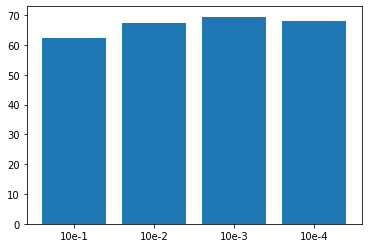

In [ ]:
#lets try with different smoothing constant
acc = []
smooth_lst = [10e-1,10e-2,10e-3,10e-4]
for s in smooth_lst:
  model = Gaussian_NB()
  model.fit(X_train,Y_train,s)  #here smoothing constant is default ie : 10e-3
  Y_pred = model.predict(X_test)
  acc.append(accurecy(Y_test,Y_pred) * 100)

arr= ['10e-1','10e-2','10e-3','10e-4']
#Plotting the results
plt.bar(arr, acc)
for i,c in enumerate(smooth_lst):
  print("for smoothing parameter ",c," Accurecy we got ",acc[i])

Scikit gaussian model takes  4.04 sec to predict.
accurecy is 55.682641965364475 %


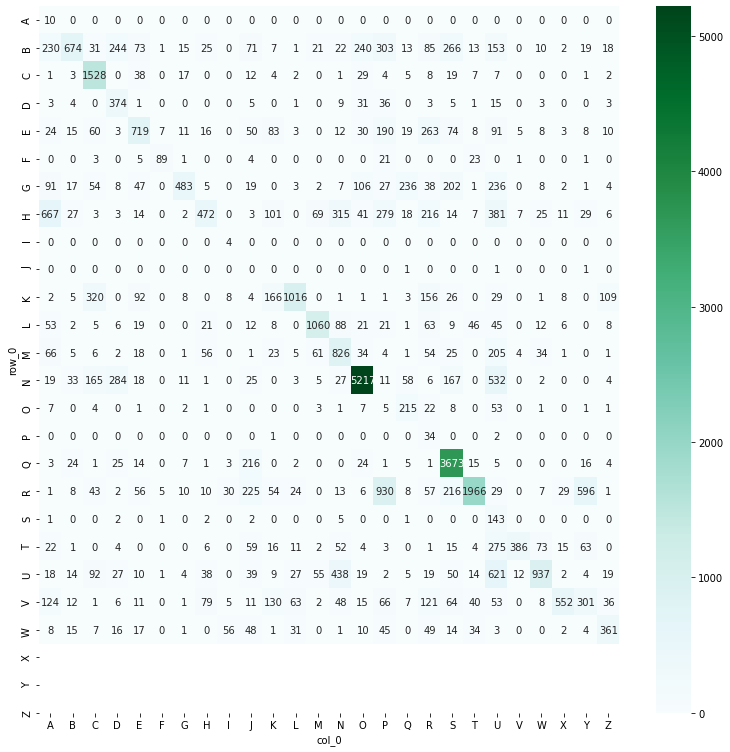

In [ ]:
#Data is trained and tested using scikit-Learn Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train,Y_train)
start = time.time()
Y_pred = model.predict(X_test)
end = time.time()
print("Scikit gaussian model takes ", "%.2f"%float(end - start), "sec to predict.")
display_confusion(Y_pred, Y_test)
print("accurecy is",accurecy(Y_test,Y_pred) *100, "%")

Scikit multinomial model takes  0.22 sec to predict.
accurecy is 70.95986038394415 %


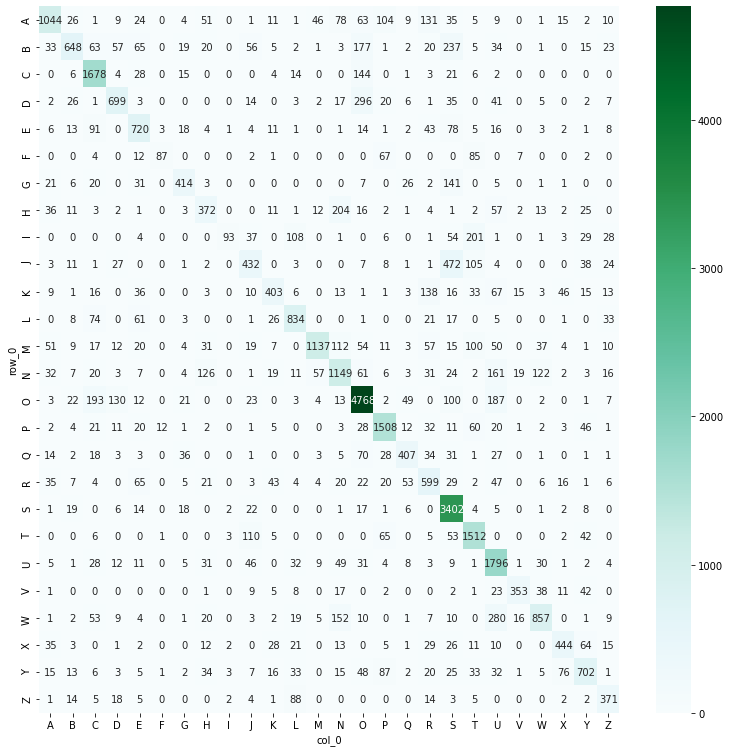

In [ ]:
#Data is trained and tested using scikit-Learn Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train,Y_train)
start = time.time()
Y_pred = model.predict(X_test)
end = time.time()
print("Scikit multinomial model takes ", "%.2f"%float(end - start), "sec to predict.")
display_confusion(Y_pred, Y_test)
print("accurecy is",accurecy(Y_test,Y_pred) *100, "%")